## Spaceship Titanic

In [99]:
import os
cwd = os.getcwd()
print(cwd)

c:\Users\marlo\OneDrive\Desktop\Anaconda\Fun\Deep Learning\Spaceship_Titanic


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

In [100]:
import pandas as pd

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [101]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [102]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


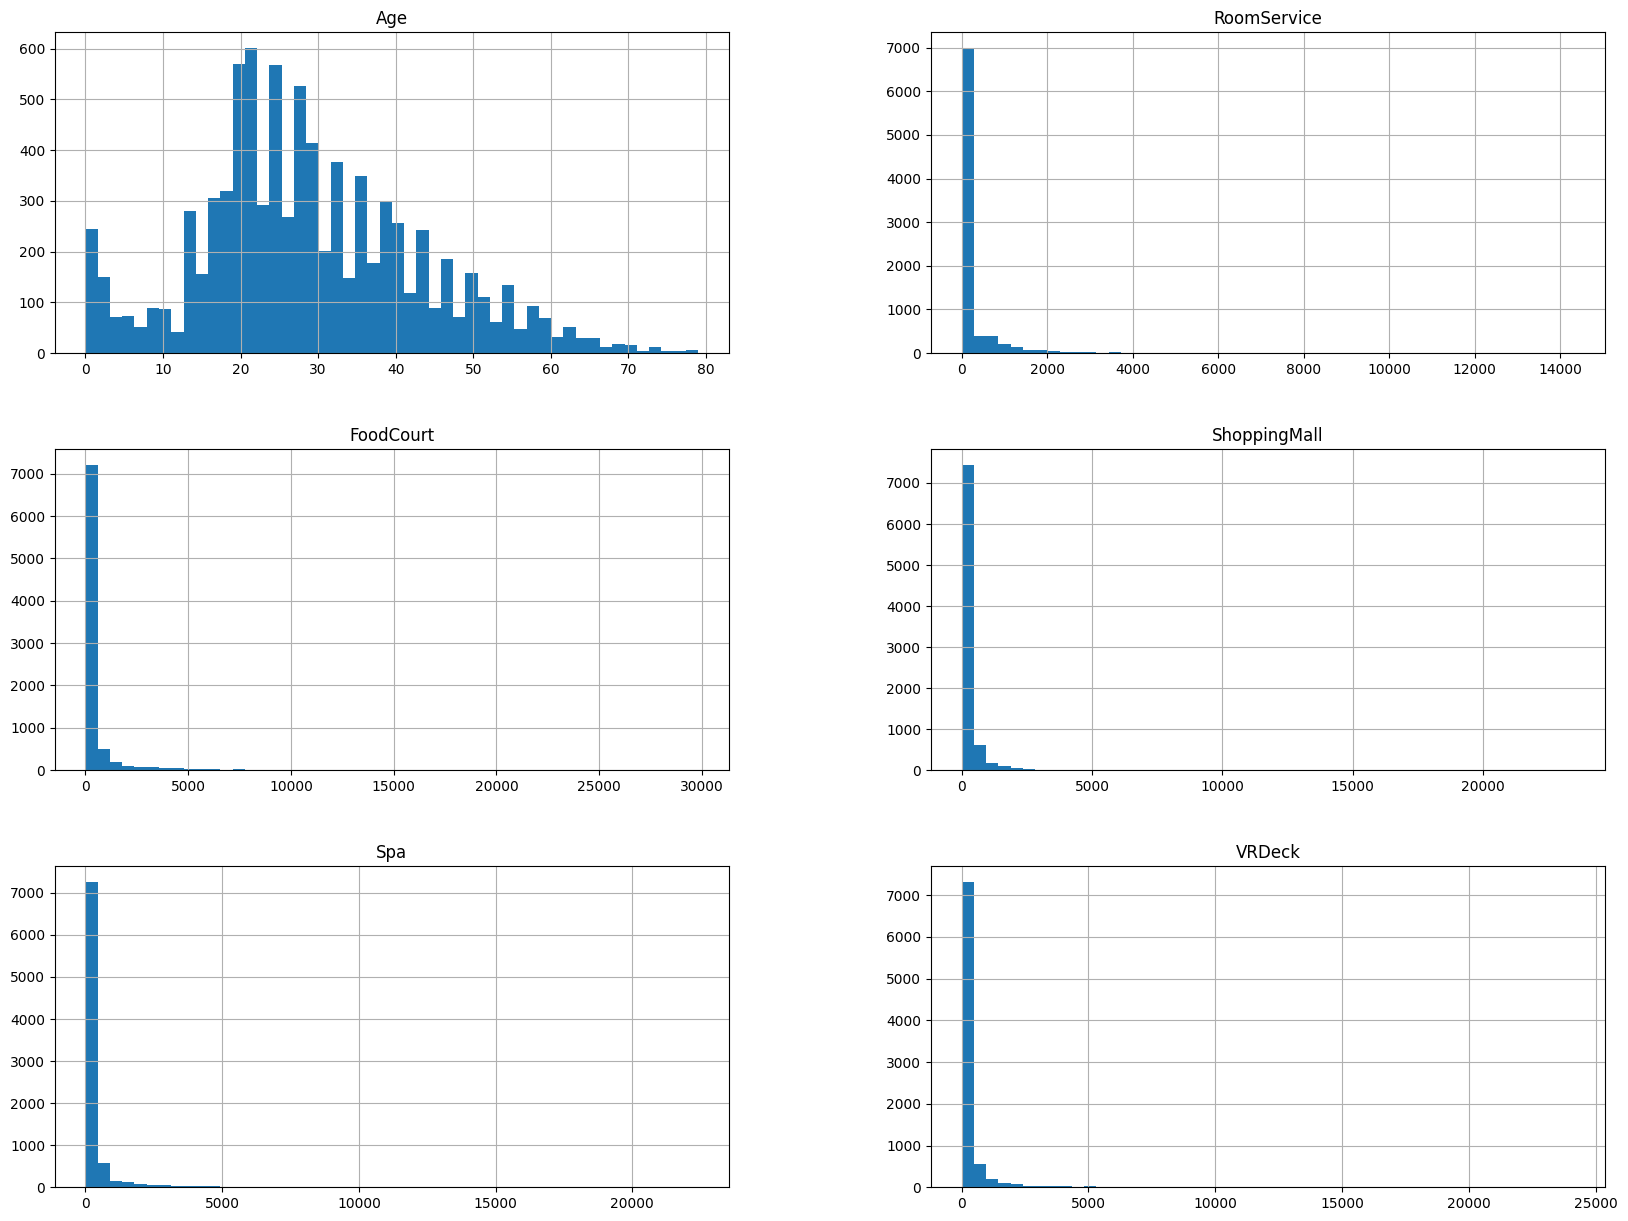

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize = (20,15))
plt.show()

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [105]:
df_train[["Deck", "Cabin_num", "Side"]] = df_train["Cabin"].str.split("/", expand=True)
df_test[["Deck", "Cabin_num", "Side"]] = df_test["Cabin"].str.split("/", expand=True)

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [106]:
try:
    df_train = df_train.drop(["PassengerId","Cabin","Name"], axis = 1)
    df_test_label = df_test["PassengerId"]
    df_test = df_test.drop(["PassengerId","Cabin","Name"], axis = 1)
except KeyError:
    print("Field does not exist")

In [107]:
df_train['total_spent']= df_train['RoomService']+ df_train['FoodCourt']+ df_train['ShoppingMall']+ df_train['Spa']+ df_train['VRDeck']
df_test['total_spent']=df_test['RoomService']+df_test['FoodCourt']+df_test['ShoppingMall']+df_test['Spa']+df_test['VRDeck']

In [108]:
df_train['AgeGroup'] = 0
for i in range(6):
    df_train.loc[(df_train.Age >= 10*i) & (df_train.Age < 10*(i + 1)), 'AgeGroup'] = i
# Same for test data
df_test['AgeGroup'] = 0
for i in range(6):
    df_test.loc[(df_test.Age >= 10*i) & (df_test.Age < 10*(i + 1)), 'AgeGroup'] = i

In [109]:
low_categorical_cols = [cname for cname in df_train.columns 
                    if df_train[cname].nunique() < 50 and 
                    df_train[cname].dtype == "object"]

numerical_cols = [cname for cname in df_train.columns if 
                df_train[cname].dtype in ['int64', 'float64']]

high_ordinal = [cname for cname in df_train.columns
                if df_train[cname].nunique() >= 50 and
               df_train[cname].dtype == "object"]

binary_cols = [cname for cname in df_train.columns 
               if df_train[cname].nunique() == 2 and 
               df_train[cname].dtype == "object" or
               df_train[cname].dtype ==  "bool"]

binary_cols = [value for value in binary_cols if value not in ['Side']]

In [110]:
print("low_categorical_cols:", low_categorical_cols)
print("numerical_cols:", numerical_cols)
print("high_ordinal:", high_ordinal)
print("binary_cols:", binary_cols)

low_categorical_cols: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
numerical_cols: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spent', 'AgeGroup']
high_ordinal: ['Cabin_num']
binary_cols: ['CryoSleep', 'VIP', 'Transported']


In [111]:
corr_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','CryoSleep','VIP','total_spent','AgeGroup']
df_train_corr = pd.concat([df_train[corr_columns] , df_train["Transported"] ], axis=1)
df_train_corr = pd.DataFrame(df_train_corr)
corr_matrix = df_train_corr.corr()
corr_matrix["Transported"].sort_values(ascending = True)

RoomService    -0.244611
Spa            -0.221131
VRDeck         -0.207075
total_spent    -0.197671
Age            -0.075026
AgeGroup       -0.065978
VIP            -0.037650
ShoppingMall    0.010141
FoodCourt       0.046566
CryoSleep       0.468645
Transported     1.000000
Name: Transported, dtype: float64

In [112]:
df_train["Cabin_num"].nunique()

1817

In [113]:
df_train["Cabin_num"].unique()

array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [114]:
amount_missing_values_in_table = (df_train.isnull().sum())
print(amount_missing_values_in_table)

# finding column names with missing values
NaN_columns =[i for i in df_train.columns
             if df_train[i].isnull().any()]
print(len(NaN_columns),"Columns have missing values, those are:",NaN_columns)

NaN_rows = [i for i in range(df_train.index[0],df_train.index[-1])
            if df_train.loc[i].isnull().any()]
print(len(NaN_rows),"Rows have missing values")

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Cabin_num       199
Side            199
total_spent     908
AgeGroup          0
dtype: int64
14 Columns have missing values, those are: ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Cabin_num', 'Side', 'total_spent']
1929 Rows have missing values


In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Extract dependant variable
try:
    df_train_tmp = df_train.drop(["Transported"], axis = 1)
    binary_cols.remove("Transported")
    
except KeyError:
    print("Field does not exist")

df_start_labels = df_train["Transported"].copy()


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('StandardScaler', StandardScaler())
])


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('LabelEncoder', OneHotEncoder(handle_unknown="ignore", sparse = False))# Try Label encoder
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, low_categorical_cols)
    ])

# get row count of original dataframe
row_count = df_train_tmp.shape[0]

# Concatenate the dataframes
df_concat = pd.concat([df_train_tmp, df_test], axis=0)

df_concat_prepared = preprocessor.fit_transform(df_concat)

# separate numpy arrays based on row count
X_train_prepared = df_concat_prepared[:row_count, :]
df_test_prepared = df_concat_prepared[row_count:, :]

df_start_labels_tmp = df_start_labels.astype(int)

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_prepared, df_start_labels_tmp, test_size=0.15, random_state=42)

In [116]:
# print the array and its dimensions
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test_prepared:", df_test_prepared.shape)

Shape of X_train: (7389, 28)
Shape of X_val: (1304, 28)
Shape of X_test_prepared: (4277, 28)


### Support Vector Machine

In [120]:
# param_grid =[
#                 {"kernel":["sigmoid","rbf"]"C":[4,6,8], "epsilon":[0.3,0.4,0.5]}
#             ]
# svc_reg = SVC(kernel="poly") 

# grid_search = GridSearchCV(svc_reg, param_grid, cv=5)
#                             # scoring ="neg_mean_squared_error",
#                             # return_train_score = True

# grid_search.fit(X_train, y_train)

# grid_search.best_params_

In [278]:
from sklearn.svm import SVC

svc_reg = SVC(kernel="rbf", C=6) 

svc_reg.fit(X_train, y_train)

c:\Users\marlo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=6)

In [279]:
from sklearn.metrics import mean_squared_error

train_predictions = svc_reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

print("Training set MSE:", train_mse*100, "%")

# evaluate on validation set
val_predictions = svc_reg.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)

print("Validation set MSE:", val_mse*100, "%")

Training set MSE: 17.431316822303426 %
Validation set MSE: 21.012269938650306 %


### SVR

In [124]:
# from sklearn.svm import SVR

# svr_reg = SVR(kernel="rbf", C=6, epsilon = 0.4) 

# svr_reg.fit(X_train, y_train)

In [125]:
# train_predictions = svr_reg.predict(X_train)
# train_mse = mean_squared_error(y_train, train_predictions)

# print("Training set MSE:", train_mse*100, "%")

# # evaluate on validation set
# val_predictions = svr_reg.predict(X_val)
# val_mse = mean_squared_error(y_val, val_predictions)

# print("Validation set MSE:", val_mse*100, "%")

### Random Forest

In [127]:
# from sklearn.model_selection import GridSearchCV
# param_grid =[
#                 {"n_estimators": [65,70,75], "max_features":[800, 1000,"auto"],"max_leaf_nodes":[140,150,160], "n_jobs":[-1]},
#                 {"n_estimators": [120,180,250], "max_features":[800, 1000,"auto"],"max_leaf_nodes":[20,30,40], "n_jobs":[-1]}
#             ]
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5)
#                         #   scoring ="neg_mean_squared_error",
#                         #   return_train_score = True

# grid_search.fit(X_train, y_train)

# grid_search.best_params_

In [128]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(max_leaf_nodes=130, n_estimators = 65,  n_jobs= -1)
# forest_reg = RandomForestRegressor(max_leaf_nodes=20, n_estimators = 100, n_jobs= -1)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=130, n_estimators=65, n_jobs=-1)

In [129]:
train_predictions = forest_reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

print("Training set MSE:", train_mse*100, "%")

# evaluate on validation set
val_predictions = forest_reg.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)

print("Validation set MSE:", val_mse*100, "%")

Training set MSE: 10.282131692077492 %
Validation set MSE: 14.331821678234316 %


### ExtraTreesRegressor

In [134]:
# param_grid =[
#                 {"n_estimators": [65,70,75], "max_features":[800, 1000,"auto"],"max_leaf_nodes":[140,150,160], "n_jobs":[-1]},
#                 {"n_estimators": [120,180,250], "max_features":[800, 1000,"auto"],"max_leaf_nodes":[20,30,40], "n_jobs":[-1]}
#             ]

# grid_search = GridSearchCV(extra_trees_reg, param_grid, cv=5)
#                         #   scoring ="neg_mean_squared_error",
#                         #   return_train_score = True

# grid_search.fit(X_train, y_train)

# grid_search.best_params_

In [136]:
from sklearn.ensemble import ExtraTreesRegressor

# extra_trees_reg.get_params().keys()

extra_trees_reg = ExtraTreesRegressor(max_features='auto', max_leaf_nodes=150, n_estimators = 65, n_jobs= -1)
# extra_trees_reg = ExtraTreesRegressor(max_leaf_nodes=20, n_estimators = 100, n_jobs=-1)
extra_trees_reg.fit(X_train, y_train)

train_predictions = extra_trees_reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

print("Training set MSE:", train_mse*100, "%")

# evaluate on validation set
val_predictions = extra_trees_reg.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)

print("Validation set MSE:", val_mse*100, "%")

Training set MSE: 11.372254201393645 %
Validation set MSE: 13.986056904018415 %


### XGBoost

In [138]:
# param_grid =[
#                 {"objective":["reg:linear","binary:logistic"],"n_estimators": [1100,1200,1300], "lambda":[0.05,0.1,0.2] ,"n_jobs":[-1]},
#             ]
# # objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability. 
# # lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

# grid_search = GridSearchCV(xgboost_reg, param_grid, cv=5)


# grid_search.fit(X_train, y_train)

# grid_search.best_params_

In [140]:
from xgboost import XGBRegressor
xgboost_reg = XGBRegressor( n_estimators= 1100, n_jobs= -1,objective= 'binary:logistic')

xgboost_reg.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)], 
             verbose=False)

c:\Users\marlo\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1100, n_jobs=-1, num_parallel_tree=None,
             objective='binary:logistic', predictor=None, ...)

In [141]:
train_predictions = xgboost_reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

print("Training set MSE:", train_mse*100, "%")

# evaluate on validation set
val_predictions = xgboost_reg.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)

print("Validation set MSE:", val_mse*100, "%")

Training set MSE: 11.40141577106229 %
Validation set MSE: 14.151021520021972 %


### Logistic Regression

In [144]:
# param_grid =[
#                 {"C": [2,4,6], "max_iter":[80,120,150] ,"l1_ratio":[0.05,0.1,0.2],"n_jobs":[-1]},
#             ]
# # objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability. 
# # lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

# grid_search = GridSearchCV(log_reg, param_grid, cv=5)


# grid_search.fit(X_train, y_train)

# grid_search.best_params_

In [146]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C= 2, l1_ratio= 0.01, max_iter= 250, n_jobs=-1)
log_reg.fit(X_train, y_train)

In [147]:
train_predictions = log_reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

print("Training set MSE:", train_mse*100, "%")

# evaluate on validation set
val_predictions = log_reg.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)

print("Validation set MSE:", val_mse*100, "%")

### CatBoostClassifier

In [149]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

gcv=GridSearchCV(CatBoostClassifier(),param_grid={'iterations': range(200,2000,200), 'eval_metric': ['Accuracy'],'verbose':[0]},cv=3)
gcv.fit(X_train,y_train)
pred_y=gcv.predict(X_val)

In [150]:
train_predictions = gcv.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

print("Training set MSE:", train_mse*100, "%")

# evaluate on validation set
val_predictions = gcv.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)

print("Validation set MSE:", val_mse*100, "%")

Training set MSE: 13.655433752875897 %
Validation set MSE: 19.78527607361963 %


### Tensorflow Neural Network Regression

In [151]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import math
tf.__version__

'2.12.0'

In [241]:
model_reg = keras.models.Sequential([
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal", input_shape=[28]),
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(1)
])

### 1Cycle scheduling

In [219]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

58/58 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.5049


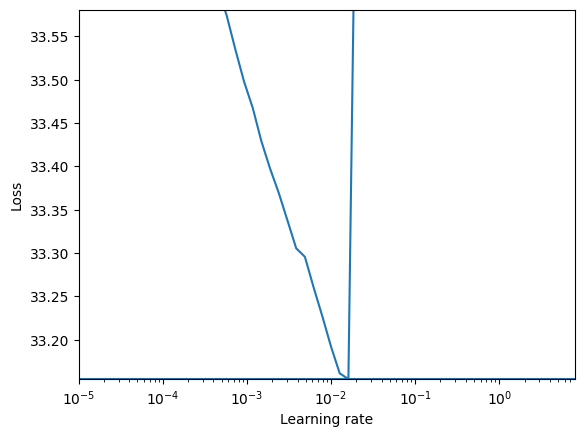

In [220]:
model_reg.compile(loss="mse",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
batch_size = 128
rates, losses = find_learning_rate(model_reg, X_train, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [221]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [222]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.1)
history = model_reg.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    callbacks=[onecycle])

Epoch 1/25
58/58 [==============================] - 1s 9ms/step - loss: 32.0894 - accuracy: 0.6948 - val_loss: 28.2135 - val_accuracy: 0.7400
Epoch 2/25
58/58 [==============================] - 0s 5ms/step - loss: 25.7391 - accuracy: 0.7707 - val_loss: 23.0321 - val_accuracy: 0.7554
Epoch 3/25
58/58 [==============================] - 0s 5ms/step - loss: 20.3007 - accuracy: 0.7840 - val_loss: 17.4741 - val_accuracy: 0.7669
Epoch 4/25
58/58 [==============================] - 0s 5ms/step - loss: 14.8894 - accuracy: 0.7871 - val_loss: 12.3276 - val_accuracy: 0.7684
Epoch 5/25
58/58 [==============================] - 0s 5ms/step - loss: 10.1644 - accuracy: 0.7916 - val_loss: 8.1038 - val_accuracy: 0.7791
Epoch 6/25
58/58 [==============================] - 0s 4ms/step - loss: 6.4696 - accuracy: 0.7933 - val_loss: 4.9700 - val_accuracy: 0.7791
Epoch 7/25
58/58 [==============================] - 0s 4ms/step - loss: 3.8588 - accuracy: 0.7908 - val_loss: 2.8669 - val_accuracy: 0.7799
Epoch 8/25


## Basic NN

In [223]:
model_reg.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 200)               5800      
                                                                 
 dense_49 (Dense)            (None, 200)               40200     
                                                                 
 dense_50 (Dense)            (None, 200)               40200     
                                                                 
 dense_51 (Dense)            (None, 1)                 201       
                                                                 
Total params: 86,401
Trainable params: 86,401
Non-trainable params: 0
_________________________________________________________________


In [242]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

# Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15,restore_best_weights=True)
exponential_decay_fn = exponential_decay(lr0=0.01, s=40)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
# lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)

# Optimizers
# optimizer= keras.optimizers.SGD(momentum=0.9,nesterov=True) # learning_rate=1e-2, 
# optimizer= keras.optimizers.Adam(lr=1e-3, beta_1 = 0.9, beta_2=0.999)
optimizer= keras.optimizers.Nadam() # lr=1e-2, beta_1 = 0.9, beta_2=0.999


# Compile
model_reg.compile(loss="mse", optimizer=optimizer, metrics=['accuracy'])

In [239]:
history = model_reg.fit(X_train, y_train, epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping_cb,lr_scheduler])

Epoch 1/200
231/231 [==============================] - 2s 4ms/step - loss: 5.8074 - accuracy: 0.7414 - val_loss: 0.1880 - val_accuracy: 0.7745 - lr: 0.0100
Epoch 2/200
231/231 [==============================] - 1s 3ms/step - loss: 0.1700 - accuracy: 0.7855 - val_loss: 0.1702 - val_accuracy: 0.7753 - lr: 0.0094
Epoch 3/200
231/231 [==============================] - 1s 3ms/step - loss: 0.1645 - accuracy: 0.7844 - val_loss: 0.1732 - val_accuracy: 0.7646 - lr: 0.0089
Epoch 4/200
231/231 [==============================] - 1s 4ms/step - loss: 0.1613 - accuracy: 0.7917 - val_loss: 0.1602 - val_accuracy: 0.7853 - lr: 0.0084
Epoch 5/200
231/231 [==============================] - 1s 3ms/step - loss: 0.1555 - accuracy: 0.7985 - val_loss: 0.1706 - val_accuracy: 0.7669 - lr: 0.0079
Epoch 6/200
231/231 [==============================] - 1s 3ms/step - loss: 0.1557 - accuracy: 0.7916 - val_loss: 0.1599 - val_accuracy: 0.7753 - lr: 0.0075
Epoch 7/200
231/231 [==============================] - 1s 3ms/st

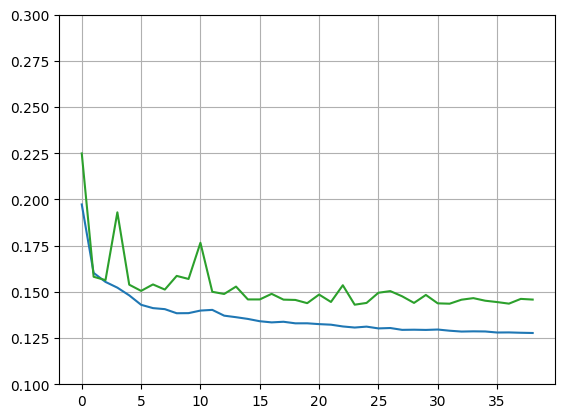

In [226]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0.1, 0.3)
plt.show()

In [227]:
train_predictions_standard = model_reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions_standard)

print("Training set MSE:", train_mse*100, "%")

# evaluate on validation set
val_predictions_standard = model_reg.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions_standard)

print("Validation set MSE:", val_mse*100, "%")

231/231 [==============================] - 0s 2ms/step
Training set MSE: 12.452182749527989 %
41/41 [==============================] - 0s 1ms/step
Validation set MSE: 13.797006389405942 %


### Inverted Neural Network to estimate death probability

In [243]:
model_inverted = keras.models.Sequential([
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal", input_shape=[28]),
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(1,activation="sigmoid")
])

In [230]:
# Invert entries
y_train_inverted = y_train.replace({1.0: 0.0, 0.0: 1.0})
y_val_inverted = y_val.replace({1.0: 0.0, 0.0: 1.0})


In [245]:
# Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15,restore_best_weights=True)
exponential_decay_fn = exponential_decay(lr0=0.01, s=40)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
# lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)

# Optimizers
# optimizer= keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9,nesterov=True)
# optimizer= keras.optimizers.Adam(lr=1e-3, beta_1 = 0.9, beta_2=0.999)
optimizer= keras.optimizers.Nadam()

model_inverted.compile(loss="mse", optimizer=optimizer, metrics=['accuracy'])

In [232]:
history = model_inverted.fit(X_train, y_train_inverted, epochs=200,
                    validation_data=(X_val, y_val_inverted),
                    callbacks=[early_stopping_cb,lr_scheduler])

Epoch 1/200
231/231 [==============================] - 2s 3ms/step - loss: 1.3368 - accuracy: 0.7743 - val_loss: 0.1686 - val_accuracy: 0.7799 - lr: 0.0100
Epoch 2/200
231/231 [==============================] - 1s 3ms/step - loss: 0.1553 - accuracy: 0.7936 - val_loss: 0.1541 - val_accuracy: 0.7830 - lr: 0.0094
Epoch 3/200
231/231 [==============================] - 1s 3ms/step - loss: 0.1505 - accuracy: 0.7990 - val_loss: 0.1548 - val_accuracy: 0.7837 - lr: 0.0089
Epoch 4/200
231/231 [==============================] - 1s 3ms/step - loss: 0.1484 - accuracy: 0.7988 - val_loss: 0.1554 - val_accuracy: 0.7845 - lr: 0.0084
Epoch 5/200
231/231 [==============================] - 1s 3ms/step - loss: 0.1478 - accuracy: 0.7986 - val_loss: 0.1595 - val_accuracy: 0.7830 - lr: 0.0079
Epoch 6/200
231/231 [==============================] - 1s 2ms/step - loss: 0.1481 - accuracy: 0.8021 - val_loss: 0.1735 - val_accuracy: 0.7592 - lr: 0.0075
Epoch 7/200
231/231 [==============================] - 1s 2ms/st

In [233]:
train_predictions_inverted = model_inverted.predict(X_train)
train_mse = mean_squared_error(y_train_inverted, train_predictions_inverted)

print("Training set MSE:", train_mse*100, "%")

# evaluate on validation set
val_predictions_inverted = model_inverted.predict(X_val)
val_mse = mean_squared_error(y_val_inverted, val_predictions_inverted)

print("Validation set MSE:", val_mse*100, "%")

231/231 [==============================] - 0s 2ms/step
Training set MSE: 12.330500612124222 %
41/41 [==============================] - 0s 2ms/step
Validation set MSE: 13.84604046885472 %


### Hyperparameter search

#### Keras-tuner

In [ ]:
# from keras_tuner import HyperParameters, RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import numpy as np

# %pip install -q -U keras-tuner
import keras_tuner as kt

In [ ]:
# Define learning schedule
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

# Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

exponential_decay_fn = exponential_decay(lr0=1e-2, s=40)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

# Define the model builder function
# Activation function aswell 
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=100, max_value=200, step=25), activation=hp.Choice("activation", ["relu", "tanh"]), kernel_regularizer=keras.regularizers.l2(0.02) , kernel_initializer="he_normal", input_shape=[28]))
    for i in range(hp.Int("num_layers", min_value=1, max_value=3, step=1)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int("units", min_value=100, max_value=200, step=25), #f"units_{i}"
                activation=hp.Choice("activation", ["relu", "tanh"]),
                kernel_initializer="he_normal",
                kernel_regularizer=keras.regularizers.l2(0.02),
            )
        )
    # if hp.Boolean("dropout"):
    model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.3, step=0.1)))
        
    model.add(layers.Dense(1))

    # Optimizers
    optimizer= keras.optimizers.SGD(momentum=0.9,nesterov=True) # learning_rate=1e-2, 

    model.compile(optimizer=optimizer , loss='mse', metrics=['accuracy'])
    return model

build_model(kt.HyperParameters())

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=100, max_value=200, step=25), activation=hp.Choice("activation", ["elu", "selu","relu"]), kernel_regularizer=keras.regularizers.l2(0.02) , kernel_initializer="he_normal", input_shape=[28]))
    for i in range(hp.Int("num_layers", min_value=1, max_value=3, step=1)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int("units", min_value=100, max_value=200, step=25), #f"units_{i}"
                activation=hp.Choice("activation", ["elu", "selu","relu"]),
                kernel_initializer="he_normal",
                kernel_regularizer=keras.regularizers.l2(0.02),
            )
        )
    # if hp.Boolean("dropout"):
    model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.3, step=0.1)))
        
    model.add(layers.Dense(1,activation="sigmoid"))

    # Optimizers
    optimizer= keras.optimizers.SGD(momentum=0.9,nesterov=True) # learning_rate=1e-2, 

    model.compile(optimizer=hp.Choice("optimizer", ["adam", "nadam"]) , loss='binary_crossentropy', metrics=['accuracy','mse'])
    return model
build_model(kt.HyperParameters())

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=100,
    executions_per_trial=2,
    overwrite=True,
    directory='Hyperparameter',
    project_name='KerasTuner'
)

tuner.search_space_summary()

Search space summary
Default search space size: 5
units (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 200, 'step': 25, 'sampling': 'linear'}
activation (Choice)
{'default': 'elu', 'conditions': [], 'values': ['elu', 'selu', 'relu'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'nadam'], 'ordered': False}


In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

tuner.search(X_train, y_train,epochs=60, validation_data=(X_val, y_val), callbacks=[early_stopping_cb,lr_scheduler])  

Trial 100 Complete [00h 00m 36s]
val_accuracy: 0.7845091819763184

Best val_accuracy So Far: 0.79179447889328
Total elapsed time: 01h 38m 36s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=30)
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 175)               5075      
                                                                 
 dense_1 (Dense)             (None, 175)               30800     
                                                                 
 dropout (Dropout)           (None, 175)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 176       
                                                                 
Total params: 36,051
Trainable params: 36,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner.results_summary()

# Trial 033 summary
# Hyperparameters:
# units: 200
# activation: relu
# l2: 0.0
# num_layers: 2
# dropout_rate: 0.2
# Score: 0.7952454090118408

# Trial 095 summary
# Hyperparameters:
# units: 150
# activation: tanh
# l2: 0.0
# num_layers: 3
# dropout_rate: 0.2
# Score: 0.7940950989723206


# Classification

# Trial 078 summary
# Hyperparameters:
# units: 175
# activation: relu
# num_layers: 1
# dropout_rate: 0.2
# optimizer: nadam
# Score: 0.79179447889328

# Trial 095 summary
# Hyperparameters:
# units: 125
# activation: relu
# num_layers: 2
# dropout_rate: 0.2
# optimizer: nadam
# Score: 0.79179447889328

Results summary
Results in Hyperparameter\KerasTuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 078 summary
Hyperparameters:
units: 175
activation: relu
num_layers: 1
dropout_rate: 0.2
optimizer: nadam
Score: 0.79179447889328

Trial 095 summary
Hyperparameters:
units: 125
activation: relu
num_layers: 2
dropout_rate: 0.2
optimizer: nadam
Score: 0.79179447889328

Trial 051 summary
Hyperparameters:
units: 150
activation: selu
num_layers: 3
dropout_rate: 0.2
optimizer: nadam
Score: 0.7914110422134399

Trial 074 summary
Hyperparameters:
units: 125
activation: selu
num_layers: 1
dropout_rate: 0.0
optimizer: adam
Score: 0.7906441688537598

Trial 091 summary
Hyperparameters:
units: 175
activation: relu
num_layers: 1
dropout_rate: 0.1
optimizer: nadam
Score: 0.7906441688537598

Trial 083 summary
Hyperparameters:
units: 175
activation: relu
num_layers: 3
dropout_rate: 0.2
optimizer: nadam
Score: 0.7902607321739197

Trial 096 summary
Hyperparameters:
units: 100


The Keras Tuner has four tuners available - RandomSearch, Hyperband, BayesianOptimization, and Sklearn

In [256]:
history = best_model.fit(X_train, y_train_inverted, epochs=200,
                    validation_data=(X_val, y_val_inverted),
                    callbacks=[early_stopping_cb,lr_scheduler])

Epoch 1/200
231/231 [==============================] - 2s 4ms/step - loss: 0.5199 - accuracy: 0.7755 - mse: 0.1539 - val_loss: 0.4812 - val_accuracy: 0.7807 - val_mse: 0.1478 - lr: 0.0100
Epoch 2/200
231/231 [==============================] - 1s 3ms/step - loss: 0.4735 - accuracy: 0.7891 - mse: 0.1439 - val_loss: 0.4795 - val_accuracy: 0.7814 - val_mse: 0.1459 - lr: 0.0094
Epoch 3/200
231/231 [==============================] - 1s 3ms/step - loss: 0.4732 - accuracy: 0.7913 - mse: 0.1442 - val_loss: 0.4837 - val_accuracy: 0.7768 - val_mse: 0.1490 - lr: 0.0089
Epoch 4/200
231/231 [==============================] - 1s 3ms/step - loss: 0.4708 - accuracy: 0.7898 - mse: 0.1434 - val_loss: 0.4710 - val_accuracy: 0.7876 - val_mse: 0.1460 - lr: 0.0084
Epoch 5/200
231/231 [==============================] - 1s 3ms/step - loss: 0.4686 - accuracy: 0.7890 - mse: 0.1436 - val_loss: 0.4691 - val_accuracy: 0.7784 - val_mse: 0.1445 - lr: 0.0079
Epoch 6/200
231/231 [==============================] - 1s 3m

In [257]:
# model_tuned = tuner.hypermodel.build(best_hps)
train_predictions = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

print("Training set MSE:", train_mse*100, "%")

# evaluate on validation set
val_predictions = best_model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)

print("Validation set MSE:", val_mse*100, "%")

231/231 [==============================] - 0s 2ms/step
Training set MSE: 59.18978166510848 %
41/41 [==============================] - 0s 2ms/step
Validation set MSE: 58.30654268687524 %


### Validation

##### Random Forest

In [263]:
# evaluate on validation set
forest_reg_val_predictions = forest_reg.predict(X_val)

for i in range(len(forest_reg_val_predictions)):
    if forest_reg_val_predictions[i] >= 0.5:
        forest_reg_val_predictions[i] = 1
    else:
        forest_reg_val_predictions[i] = 0

val_mse = mean_squared_error(y_val, forest_reg_val_predictions)

print("forest_reg validation set MSE:", val_mse*100, "%")

forest_reg validation set MSE: 21.472392638036812 %


##### Extra_Trees

In [264]:
# evaluate on validation set
extra_trees_reg_val_predictions = extra_trees_reg.predict(X_val)

for i in range(len(extra_trees_reg_val_predictions)):
    if extra_trees_reg_val_predictions[i] >= 0.5:
        extra_trees_reg_val_predictions[i] = 1
    else:
        extra_trees_reg_val_predictions[i] = 0

val_mse = mean_squared_error(y_val, extra_trees_reg_val_predictions)

print("extra_trees_reg validation set MSE:", val_mse*100, "%")

extra_trees_reg validation set MSE: 20.782208588957054 %


##### XGBoost

In [265]:
# evaluate on validation set
xgboost_reg_val_predictions = xgboost_reg.predict(X_val)

for i in range(len(xgboost_reg_val_predictions)):
    if xgboost_reg_val_predictions[i] >= 0.5:
        xgboost_reg_val_predictions[i] = 1
    else:
        xgboost_reg_val_predictions[i] = 0

val_mse = mean_squared_error(y_val, xgboost_reg_val_predictions)
print("XGBoost validation set MSE:", val_mse*100, "%")


XGBoost validation set MSE: 21.70245398773006 %


#### CatBoostClassifier

In [266]:
# evaluate on validation set
extra_trees_reg_val_predictions = gcv.predict(X_val)

for i in range(len(extra_trees_reg_val_predictions)):
    if extra_trees_reg_val_predictions[i] >= 0.5:
        extra_trees_reg_val_predictions[i] = 1
    else:
        extra_trees_reg_val_predictions[i] = 0

val_mse = mean_squared_error(y_val, extra_trees_reg_val_predictions)

print("gcv validation set MSE:", val_mse*100, "%")

gcv validation set MSE: 19.78527607361963 %


##### Tensorflow Neural Network Regression

In [267]:
# evaluate on validation set
model_reg_val_predictions = model_reg.predict(X_val)

for i in range(len(model_reg_val_predictions)):
    if model_reg_val_predictions[i] >= 0.5:
        model_reg_val_predictions[i] = 1
    else:
        model_reg_val_predictions[i] = 0

val_mse = mean_squared_error(y_val, model_reg_val_predictions)

print("Model_Reg validation set MSE:", val_mse*100, "%")

41/41 [==============================] - 0s 2ms/step
Model_Reg validation set MSE: 20.782208588957054 %


#### Network Combined predictions

In [269]:
train_preds = [0] * len(train_predictions_inverted)
for i in range(len(train_predictions_inverted)):
    if train_predictions_standard[i] > train_predictions_inverted[i]:
        train_preds[i] = 1
    else: 
        train_preds[i] = 0

val_preds = [0] * len(val_predictions_inverted)
for i in range(len(val_predictions_inverted)):
    # print("Standard:", val_predictions_standard[i], "// Inverted:",val_predictions_inverted[i])
    # print(val_predictions_standard[i] > val_predictions_inverted[i])

    if val_predictions_standard[i] > val_predictions_inverted[i]:
        val_preds[i] = 1
    else:
        val_preds[i] = 0
    # print("The prediction is:", val_preds[i])


In [270]:
train_mse = mean_squared_error(y_train, train_preds)

print("Training set MSE:", train_mse*100, "%")

# evaluate on validation set
val_mse = mean_squared_error(y_val, val_preds)

print("Validation set MSE:", val_mse*100, "%")

Training set MSE: 17.417783191230207 %
Validation set MSE: 21.395705521472394 %


## Ensemble Learning

##### VotingRegressor

In [276]:
from sklearn.ensemble import VotingRegressor
voting_clf = VotingRegressor(
    estimators=[('Random Forest',forest_reg),('Extra_Trees',extra_trees_reg),('XGBoost',xgboost_reg)]
    #, voting ='hard'
)

voting_clf.fit(X_train,y_train)

VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(max_leaf_nodes=130,
                                                   n_estimators=65,
                                                   n_jobs=-1)),
                            ('Extra_Trees',
                             ExtraTreesRegressor(max_leaf_nodes=150,
                                                 n_estimators=65, n_jobs=-1)),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_round...
                                          grow_policy=None,
                                          importance_type=None,
  

In [ ]:
for i in range(len(val_predictions)):
    if val_predictions[i] >= 0.5:
        val_predictions[i] = 1
    else:
        val_predictions[i] = 0

val_mse = mean_squared_error(y_val, val_predictions)

print("Validation set MSE:", val_mse*100, "%")

Validation set MSE: 21.088957055214724 %


## Submission

In [ ]:
print("X_train",X_train.shape)
print("X_val",X_val.shape)

X_train (7389, 28)
X_val (1304, 28)


In [ ]:
# import numpy as np
# X = np.concatenate((X_train, X_val), axis=0)
# y = np.concatenate([y_train, y_val], axis=0)

X_train = pd.DataFrame (X_train)
X_val = pd.DataFrame (X_val)
y_train = pd.DataFrame (y_train)
y_val = pd.DataFrame (y_val)


X = pd.concat((X_train, X_val), axis=0)
y = pd.concat([y_train, y_val], axis=0)

#### ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
extra_trees_reg = ExtraTreesRegressor(max_features='auto', max_leaf_nodes=150, n_estimators = 65, n_jobs= -1)
extra_trees_reg.fit(X, y)

train_predictions = extra_trees_reg.predict(df_test_prepared)

C:\Users\marlo\AppData\Local\Temp\ipykernel_19484\657694134.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_reg.fit(X, y)


In [ ]:
pred_list = [0] * len(train_predictions)
for i in range(len(train_predictions)):
    if train_predictions[i] >= 0.5:
        pred_list[i] = 1
    else:
        pred_list[i] = 0
preds = [bool(x) for x in pred_list]

In [ ]:
PassengerId = pd.DataFrame(df_test_label)
Transported = pd.DataFrame(preds)

Submission = pd.concat([PassengerId,Transported], axis= 1)
Submission.columns = ['PassengerId', 'Transported']

In [ ]:
Submission.to_csv('Submission_extra_trees_reg.csv', index=False)

#### XGBRegressor

In [ ]:
from xgboost import XGBRegressor
xgboost_reg = XGBRegressor( n_estimators= 1100, n_jobs= -1,objective= 'binary:logistic')

xgboost_reg.fit(X, y)
train_predictions = xgboost_reg.predict(df_test_prepared)

In [ ]:
pred_list = [0] * len(train_predictions)
for i in range(len(train_predictions)):
    if train_predictions[i] >= 0.5:
        pred_list[i] = 1
    else:
        pred_list[i] = 0
preds = [bool(x) for x in pred_list]

In [ ]:
PassengerId = pd.DataFrame(df_test_label)
Transported = pd.DataFrame(preds)

Submission = pd.concat([PassengerId,Transported], axis= 1)
Submission.columns = ['PassengerId', 'Transported']

In [ ]:
Submission.to_csv('Submission_xgboost_reg.csv', index=False)

#### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(max_leaf_nodes=130, n_estimators = 65,  n_jobs= -1)

forest_reg.fit(X, y)
train_predictions = forest_reg.predict(df_test_prepared)

C:\Users\marlo\AppData\Local\Temp\ipykernel_19484\2100024515.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X, y)


In [ ]:
pred_list = [0] * len(train_predictions)
for i in range(len(train_predictions)):
    if train_predictions[i] >= 0.5:
        pred_list[i] = 1
    else:
        pred_list[i] = 0
preds = [bool(x) for x in pred_list]

In [ ]:
PassengerId = pd.DataFrame(df_test_label)
Transported = pd.DataFrame(preds)

Submission = pd.concat([PassengerId,Transported], axis= 1)
Submission.columns = ['PassengerId', 'Transported']

In [ ]:
Submission.to_csv('Submission_forest_reg.csv', index=False)

#### Neural Network regression

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.12.0'

In [ ]:
history = best_model.fit(X, y, epochs=70)

Epoch 1/70
272/272 [==============================] - 1s 3ms/step - loss: 0.9232 - accuracy: 0.4451 - mse: 0.3220
Epoch 2/70
272/272 [==============================] - 1s 3ms/step - loss: 0.6764 - accuracy: 0.6210 - mse: 0.2349
Epoch 3/70
272/272 [==============================] - 1s 2ms/step - loss: 0.6547 - accuracy: 0.6690 - mse: 0.2248
Epoch 4/70
272/272 [==============================] - 1s 3ms/step - loss: 0.6316 - accuracy: 0.7039 - mse: 0.2139
Epoch 5/70
272/272 [==============================] - 1s 3ms/step - loss: 0.6084 - accuracy: 0.7275 - mse: 0.2030
Epoch 6/70
272/272 [==============================] - 1s 2ms/step - loss: 0.5911 - accuracy: 0.7393 - mse: 0.1950
Epoch 7/70
272/272 [==============================] - 1s 3ms/step - loss: 0.5779 - accuracy: 0.7536 - mse: 0.1888
Epoch 8/70
272/272 [==============================] - 1s 3ms/step - loss: 0.5645 - accuracy: 0.7606 - mse: 0.1829
Epoch 9/70
272/272 [==============================] - 1s 3ms/step - loss: 0.5570 - accur

In [ ]:
train_predictions = best_model.predict(df_test_prepared)

134/134 [==============================] - 0s 2ms/step


In [ ]:
pred_list = [0] * len(train_predictions)
for i in range(len(train_predictions)):
    if train_predictions[i] >= 0.5:
        pred_list[i] = 1
    else:
        pred_list[i] = 0
preds = [bool(x) for x in pred_list]

In [ ]:
PassengerId = pd.DataFrame(df_test_label)
Transported = pd.DataFrame(preds)

Submission = pd.concat([PassengerId,Transported], axis= 1)
Submission.columns = ['PassengerId', 'Transported']

In [ ]:
Submission.to_csv('Submission_model_reg.csv', index=False)

## Inverted Neural Net

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
# lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)

model_reg.fit(X, y, epochs=50,callbacks=[lr_scheduler])

Epoch 1/50
272/272 [==============================] - 2s 3ms/step - loss: 4.4107 - accuracy: 0.7566 - lr: 0.0100
Epoch 2/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1677 - accuracy: 0.7865 - lr: 0.0094
Epoch 3/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1637 - accuracy: 0.7852 - lr: 0.0089
Epoch 4/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1588 - accuracy: 0.7910 - lr: 0.0084
Epoch 5/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1559 - accuracy: 0.7899 - lr: 0.0079
Epoch 6/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1529 - accuracy: 0.7954 - lr: 0.0075
Epoch 7/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1507 - accuracy: 0.7965 - lr: 0.0071
Epoch 8/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1496 - accuracy: 0.7963 - lr: 0.0067
Epoch 9/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1518 - accuracy: 0.7

In [ ]:
y_inverted = y.replace({1.0: 0.0, 0.0: 1.0})

model_inverted.fit(X, y_inverted, epochs=60, callbacks=[lr_scheduler])
#  validation_data=(X_val, y_val_inverted),

Epoch 1/60
272/272 [==============================] - 2s 2ms/step - loss: 2.6415 - accuracy: 0.7682 - lr: 0.0100
Epoch 2/60
272/272 [==============================] - 1s 2ms/step - loss: 0.1627 - accuracy: 0.7861 - lr: 0.0094
Epoch 3/60
272/272 [==============================] - 1s 3ms/step - loss: 0.1576 - accuracy: 0.7899 - lr: 0.0089
Epoch 4/60
272/272 [==============================] - 1s 3ms/step - loss: 0.1556 - accuracy: 0.7941 - lr: 0.0084
Epoch 5/60
272/272 [==============================] - 1s 3ms/step - loss: 0.1563 - accuracy: 0.7924 - lr: 0.0079
Epoch 6/60
272/272 [==============================] - 1s 3ms/step - loss: 0.1659 - accuracy: 0.7933 - lr: 0.0075
Epoch 7/60
272/272 [==============================] - 1s 3ms/step - loss: 0.1542 - accuracy: 0.7968 - lr: 0.0071
Epoch 8/60
272/272 [==============================] - 1s 3ms/step - loss: 0.1514 - accuracy: 0.7989 - lr: 0.0067
Epoch 9/60
272/272 [==============================] - 1s 3ms/step - loss: 0.1548 - accuracy: 0.7

### MC Dropout

In [ ]:
import numpy as np
y_probas_reg = np.stack([model_reg(df_test_prepared, training=True) for _ in range(100)])
y_proba_reg = y_probas_reg.mean(axis=0)

y_probas_inverted = np.stack([model_inverted(df_test_prepared, training=True) for _ in range(100)])
y_proba_inverted = y_probas_inverted.mean(axis=0)

In [ ]:
y_pred = np.argmax(y_proba_reg, axis=1)
y_pred

### Transformation of preds

In [ ]:
predictions_standard = model_reg.predict(df_test_prepared)
predictions_inverted = model_inverted.predict(df_test_prepared)

134/134 [==============================] - 0s 1ms/step


In [ ]:
print(len(predictions_standard))
preds = [0] * len(predictions_standard)
for i in range(len(predictions_standard)):
    # print("Standard:", predictions_standard[i], "// Inverted:",predictions_inverted[i])
    if predictions_standard[i] > predictions_inverted[i]:
        preds[i] = 1
    else: 
        preds[i] = 0
    print("The prediction is:", preds[i])

4277
The prediction is: 1
The prediction is: 0
The prediction is: 1
The prediction is: 1
The prediction is: 1
The prediction is: 1
The prediction is: 1
The prediction is: 1
The prediction is: 1
The prediction is: 1
The prediction is: 0
The prediction is: 0
The prediction is: 1
The prediction is: 0
The prediction is: 0
The prediction is: 0
The prediction is: 0
The prediction is: 1
The prediction is: 1
The prediction is: 0
The prediction is: 1
The prediction is: 0
The prediction is: 1
The prediction is: 1
The prediction is: 1
The prediction is: 0
The prediction is: 1
The prediction is: 1
The prediction is: 0
The prediction is: 1
The prediction is: 1
The prediction is: 0
The prediction is: 1
The prediction is: 0
The prediction is: 0
The prediction is: 0
The prediction is: 1
The prediction is: 1
The prediction is: 1
The prediction is: 0
The prediction is: 1
The prediction is: 0
The prediction is: 1
The prediction is: 0
The prediction is: 0
The prediction is: 1
The prediction is: 0
The pred

In [ ]:
preds = [bool(x) for x in preds]

In [ ]:
PassengerId = pd.DataFrame(df_test_label)
Transported = pd.DataFrame(preds)

Submission = pd.concat([PassengerId,Transported], axis= 1)
Submission.columns = ['PassengerId', 'Transported']

In [ ]:
Submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [ ]:
Submission.to_csv('2.Submission.csv', index=False)

## CatBoostClassifier

In [ ]:
gcv.fit(X,y)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002898219BCD0>,
             param_grid={'eval_metric': ['Accuracy'],
                         'iterations': range(200, 2000, 200), 'verbose': [0]})

In [ ]:
preds_gcv = gcv.predict(df_test_prepared)
Transported = [bool(x) for x in preds_gcv]
Transported = pd.DataFrame(Transported)
print(Transported)

[1 0 1 ... 1 1 1]
          0
0      True
1     False
2      True
3      True
4      True
...     ...
4272   True
4273  False
4274   True
4275   True
4276   True

[4277 rows x 1 columns]


In [ ]:
PassengerId = pd.DataFrame(df_test_label)
Submission = pd.concat([PassengerId,Transported], axis= 1)

Submission.columns = ['PassengerId', 'Transported']

In [ ]:
Submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
Submission.to_csv('1.Submission.csv.csv', index=False)